#Importing the packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Loading the dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.rename(columns = {'Annual Income (k$)':'Annual Income','Spending Score (1-100)':'Spending Score'}, inplace = True)
df.drop('CustomerID', axis = 1, inplace = True)

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#Visualization

#Univariate Analysis

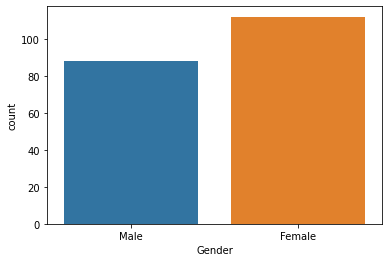

In [6]:
sns.countplot(x = 'Gender', data = df)

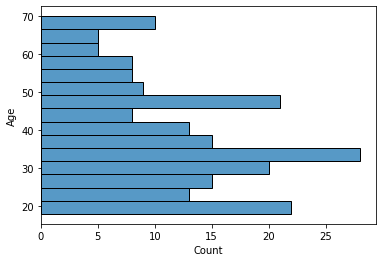

In [7]:
sns.histplot(y = 'Age', data = df, bins = 15)

#Bi-Variate Analysis

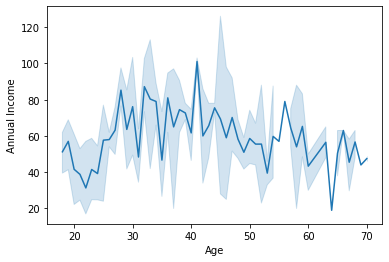

In [8]:
sns.lineplot(x = 'Age', y = 'Annual Income', data = df)

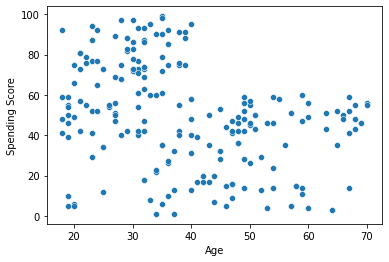

In [9]:
sns.scatterplot(x = 'Age', y ='Spending Score', data = df)

#Multi-Variate Analysis

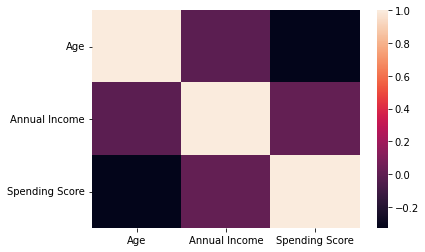

In [10]:
sns.heatmap(df.corr())

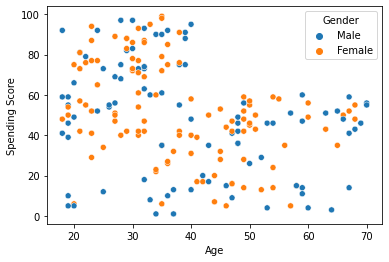

In [12]:
sns.scatterplot(x = 'Age', y ='Spending Score', hue = 'Gender', data = df)

#Descriptive Statistics

In [13]:
df.describe(include = 'all')

,Gender,Age,Annual Income,Spending Score
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


In [14]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Age               38.85
Annual Income     60.56
Spending Score    50.20
dtype: float64

In [15]:
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Age               36.0
Annual Income     61.5
Spending Score    50.0
dtype: float64

In [16]:
df.mode().head(1)

,Gender,Age,Annual Income,Spending Score
0,Female,32.0,54,42.0


In [17]:
df.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Age               13.969007
Annual Income     26.264721
Spending Score    25.823522
dtype: float64

#Handling Missing Values

#There aren't any missing values

In [18]:
df.isnull().sum()

Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

#Finding outliers

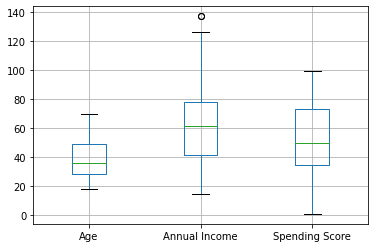

In [19]:
df.boxplot()

#Outlier is present only in the Annual Income column

#Number of outliers were two data points , so we discard it

In [20]:
df = df.drop(df[df['Annual Income'] > 127].index)

In [21]:
df.head()

,Gender,Age,Annual Income,Spending Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


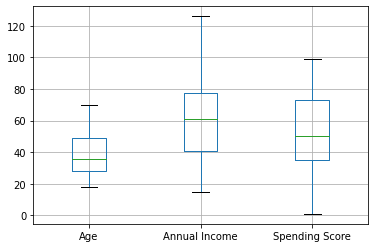

In [22]:
df.boxplot()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 197
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          198 non-null    object
 1   Age             198 non-null    int64 
 2   Annual Income   198 non-null    int64 
 3   Spending Score  198 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.7+ KB


#Checking for categorical variables

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le = LabelEncoder()

In [29]:
df['Gender'] = le.fit_transform(df['Gender'])

In [30]:
df.head()

,Gender,Age,Annual Income,Spending Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


#Scaling the data

In [31]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [32]:
df_scaled = mms.fit_transform(df)

In [33]:
df_scaled

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00900901, 0.05102041],
       [0.        , 0.09615385, 0.00900901, 0.7755102 ],
       [0.        , 0.25      , 0.01801802, 0.39795918],
       [0.        , 0.07692308, 0.01801802, 0.76530612],
       [0.        , 0.32692308, 0.02702703, 0.05102041],
       [0.        , 0.09615385, 0.02702703, 0.94897959],
       [1.        , 0.88461538, 0.03603604, 0.02040816],
       [0.        , 0.23076923, 0.03603604, 0.7244898 ],
       [1.        , 0.94230769, 0.03603604, 0.13265306],
       [0.        , 0.32692308, 0.03603604, 1.        ],
       [0.        , 0.76923077, 0.04504505, 0.14285714],
       [0.        , 0.11538462, 0.04504505, 0.7755102 ],
       [1.        , 0.36538462, 0.04504505, 0.12244898],
       [1.        , 0.07692308, 0.04504505, 0.79591837],
       [0.        , 0.32692308, 0.05405405, 0.34693878],
       [1.        , 0.03846154,

In [34]:
df_scaled.shape

(198, 4)

#Performing clustering

In [35]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 5)
cluster = km.fit_predict(df_scaled)

In [36]:
cluster

array([4, 4, 3, 0, 0, 0, 3, 0, 2, 0, 2, 0, 3, 0, 2, 4, 3, 4, 2, 0, 2, 4,
       3, 4, 3, 4, 3, 4, 3, 0, 2, 0, 2, 4, 3, 0, 3, 0, 3, 0, 3, 4, 2, 0,
       3, 0, 3, 0, 0, 0, 3, 4, 0, 2, 3, 2, 3, 2, 0, 2, 2, 4, 3, 3, 2, 4,
       3, 3, 4, 0, 2, 3, 3, 3, 2, 4, 3, 4, 0, 3, 2, 4, 2, 3, 0, 2, 3, 0,
       0, 3, 3, 4, 2, 3, 0, 4, 3, 0, 2, 4, 0, 3, 2, 4, 2, 0, 3, 2, 2, 2,
       2, 0, 3, 4, 0, 0, 3, 3, 3, 3, 4, 3, 0, 4, 0, 0, 1, 4, 2, 4, 1, 4,
       0, 0, 1, 0, 3, 4, 1, 0, 3, 4, 0, 0, 1, 4, 1, 0, 3, 4, 1, 4, 3, 0,
       3, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 3, 4, 1, 4, 1, 4, 3, 0,
       1, 4, 1, 4, 3, 0, 1, 0, 3, 4, 3, 4, 3, 0, 3, 0, 1, 0, 3, 0, 3, 4],
      dtype=int32)

In [37]:
np.unique(cluster)

array([0, 1, 2, 3, 4], dtype=int32)

In [38]:
cluster.shape

(198,)

#Adding cluster data with primary data

In [39]:
names = df.columns

In [40]:
new_df = pd.DataFrame(df_scaled, columns = names)

In [41]:
new_df.head()

,Gender,Age,Annual Income,Spending Score
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.009009,0.051020
3,0.0,0.096154,0.009009,0.775510
4,0.0,0.250000,0.018018,0.397959


In [42]:
new_df['clus'] = pd.Series(cluster)

In [43]:
new_df.head()

,Gender,Age,Annual Income,Spending Score,clus
0,1.0,0.019231,0.000000,0.387755,4
1,1.0,0.057692,0.000000,0.816327,4
2,0.0,0.038462,0.009009,0.051020,3
3,0.0,0.096154,0.009009,0.775510,0
4,0.0,0.250000,0.018018,0.397959,0


#Splitting data into dependent and independent variables

In [44]:
# X is independent variable and y is dependent
X = new_df.iloc[:,:4]
y = new_df.iloc[:,4:]

In [45]:
X.shape

(198, 4)

In [46]:
y.shape

(198, 1)

#Splitting into training and testing datasets

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [48]:
X_train.shape

(148, 4)

In [49]:
y_train.shape

(148, 1)

In [50]:
X_test.shape

(50, 4)

In [51]:
y_test.shape

(50, 1)

#Building the model

In [52]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear')

#Train the model

In [53]:
svm.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [54]:
SVC(kernel='linear')

SVC(kernel='linear')

#Test the model

In [55]:
pred_test = svm.predict(X_test)

In [56]:
pred_test

array([0, 3, 3, 3, 4, 1, 4, 0, 0, 0, 2, 2, 0, 0, 0, 3, 0, 0, 2, 0, 4, 3,
       3, 3, 0, 3, 3, 3, 4, 4, 0, 1, 2, 0, 3, 0, 3, 1, 0, 3, 2, 3, 3, 2,
       4, 0, 3, 0, 0, 4], dtype=int32)

In [57]:
y_test.head()

,clus
175,0
40,3
34,3
90,3
145,4


#Evaluation Metrics

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(pred_test,y_test)

1.0

In [59]:
confusion_matrix(pred_test,y_test)

array([[18,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0],
       [ 0,  0,  6,  0,  0],
       [ 0,  0,  0, 16,  0],
       [ 0,  0,  0,  0,  7]])